In [2]:
import unicodecsv
def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments_filename = '../DataMaterials/enrollments.csv'
engagement_filename = '../DataMaterials/daily-engagement.csv'
submissions_filename = '../DataMaterials/project-submissions.csv'


enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)     # Replace this with your code
project_submissions = read_csv(submissions_filename)  # Replace this with your code


In [3]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [4]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [5]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [6]:
# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [7]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [8]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [9]:
print(len(enrollments))

unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
    
len(unique_enrolled_students)

1640


1302

In [10]:
len(daily_engagement)

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
len(unique_engagement_students)


1237

In [11]:
len(project_submissions)

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

In [12]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del(engagement_record['acct'])

## 重新定义的函数

In [13]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [14]:
print(len(enrollments))
unique_enrolled_students = get_unique_students(enrollments)
print(len(unique_enrolled_students))
print(len(daily_engagement))
unique_engagement_students = get_unique_students(daily_engagement)
print(len(unique_engagement_students))
print(len(project_submissions))
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

1640
1302
136240
1237
3642


743

In [15]:
daily_engagement[0]


OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## 数据存在的问题

In [16]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break
    

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [17]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
#         print(enrollment)
        num_problem_students += 1

num_problem_students

3

In [18]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)        

6

In [19]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data


In [20]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
print(len(non_udacity_enrollments))

1622


In [21]:
def remove_udacity_accounts_b(data):
    non_udacity_data = [data_point for data_point in data if data_point['account_key'] not in udacity_test_accounts ]    
    return non_udacity_data

In [22]:
non_udacity_enrollments = remove_udacity_accounts_b(enrollments)
print(len(non_udacity_enrollments))

1622


In [23]:
non_udacity_engagement = remove_udacity_accounts_b(daily_engagement)
non_udacity_submissions = remove_udacity_accounts_b(project_submissions)
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

135656
3634


In [24]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## 获取一周数据

In [25]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [26]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [27]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
        


In [28]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [29]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)


In [30]:
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes



In [31]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print(len(total_minutes))
# print(total_minutes)
print('Mean:', np.mean(list(total_minutes)))
print('Standard deviation:', np.std(list(total_minutes)))
print('Minimum:', np.min(list(total_minutes)))
print('Maximum:', np.max( list(total_minutes) ))

995
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## 用于代码的调试

In [32]:
student_with_max_minutes = None
max_minutes = 0
# print(total_minutes_by_account)
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print(max_minutes)

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

3564.7332644989997
OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 

In [33]:
max(total_minutes_by_account.items(), key=lambda pair: pair[1])

('163', 3564.7332644989997)

## 统计第一周完成的课时

In [34]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

# print(engagement_by_account)


In [35]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

# print(total_minutes_by_account)
    

Populating the interactive namespace from numpy and matplotlib
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


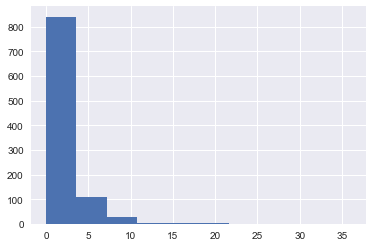

In [36]:
%pylab inline

import matplotlib.pyplot as plt
def describe_data(data):
    print('Mean:', np.mean(list(data)))
    print('Standard deviation:', np.std(list(data)))
    print('Minimum:', np.min(list(data)))
    print('Maximum:', np.max( list(data) ))
    plt.hist(data)

    
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_completed_by_account.values())

In [37]:
print(engagement_by_account)
        

defaultdict(<class 'list'>, {'0': [OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.2848873333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.6337463333), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.4892696667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.dateti

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


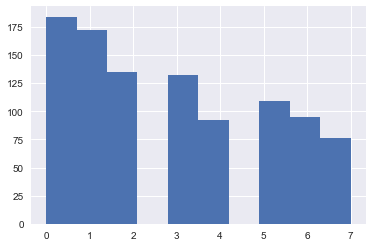

In [38]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

## 划分及格学员

In [39]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating =='DISTINCTION')):
        pass_subway_project.add(submission['account_key'])


len(pass_subway_project)

647

In [40]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
         non_passing_engagement.append(engagement_record)
            
print(len(passing_engagement))
print(len(non_passing_engagement))
        


4527
2392


## 比较两组数据

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


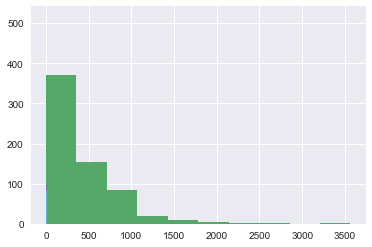

In [41]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project')

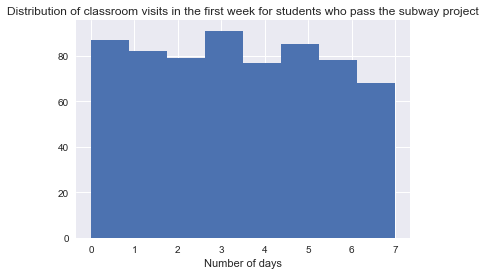

In [44]:
import seaborn as sns

sns.set(color_codes=True)
# plt.hist(non_passing_visits.values(), bins=8)
# plt.xlabel('Number of days')
# plt.title('Distribution of classroom visits in the first week ' + 
#           'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')